In [19]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### LHC data

In [17]:
 # open the file of interest, and use pickle loading
infile = open ("./Higgs.pkl",'rb') # Signal
signal = pickle.load(infile)

infile2 = open("./qcd_100000_pt_250_500.pkl",'rb')
background = pickle.load(infile2)

# list all keys of the files
print(signal.keys())
background.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

1. Make two plots of Mass and d2 each with Signal and Background distributions. Describe the shape of the two distribution, commenting on the discrimination power of signal and background. Also make a 2D scatter plot between Mass and d2 for both signal and background.

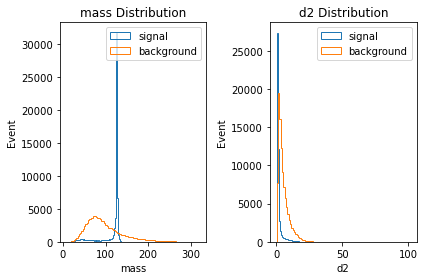

In [12]:
#  Two distributions of Mass and d2
fig, ax = plt.subplots(1,2)

ax[0].hist(signal['mass'], bins =100, histtype='step', label='signal')
ax[0].hist(background['mass'], bins =100, histtype='step', label='background')
ax[0].set_title('mass Distribution')
ax[0].set_xlabel('mass')
ax[0].set_ylabel('Event')
ax[0].legend()

# Histogram of d2
ax[1].hist(signal['d2'], bins =100, histtype='step', label='signal')
ax[1].hist(background['d2'], bins =100, histtype='step', label='background')
ax[1].set_title('d2 Distribution')
ax[1].set_xlabel('d2')
ax[1].set_ylabel('Event')
ax[1].legend()

plt.tight_layout()

## FINISH 
In the plot for mass, the shape of the signal distribution is very distinct from the shape of the background distribution. The signal distribution is gathered towards a central mass of about 125. The background distribution also has a single peak located around a mass of 75, though the event count at this mass is significantly smaller than the highest event count for a mass value of the signal distribution. In general, the background distribution more closely resembles a positively skewed normal distribution, while the sinal distribution has a very large spike. 
<br>
<br>
In the plot for d2, both the signal and background distributions are similar in shape, with a very noticeable spike. Additionally, both graphs appear positively skewed, though the background distribuition is more spread out than the signal. 

In [ ]:
#  Two scatterplots of Mass and d2
fig, ax = plt.subplots(1,2)

ax[0].hist(signal['mass'], bins =100, histtype='step', label='signal')
ax[0].hist(background['mass'], bins =100, histtype='step', label='background')
ax[0].set_title('mass Distribution')
ax[0].set_xlabel('mass')
ax[0].set_ylabel('Event')
ax[0].legend()

# Histogram of d2
ax[1].hist(signal['d2'], bins =100, histtype='step', label='signal')
ax[1].hist(background['d2'], bins =100, histtype='step', label='background')
ax[1].set_title('d2 Distribution')
ax[1].set_xlabel('d2')
ax[1].set_ylabel('Event')
ax[1].legend()

plt.tight_layout()

2. Now assume a signal yield of 100 and a background yield of 20,000, re-weight the signal and background distribution such that they satisfy this yield. Then draw two histograms with the signal stacked on the background. Describe the visibility of observing the signal over the background

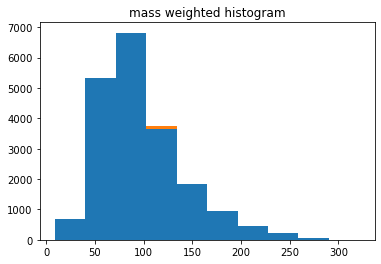

weighted: For signal mass, the yield is 20000.000000008542, the area is 624853.5434193931
weighted: For background mass, the yield is 20100.000000008502, the area is 627977.8111364875


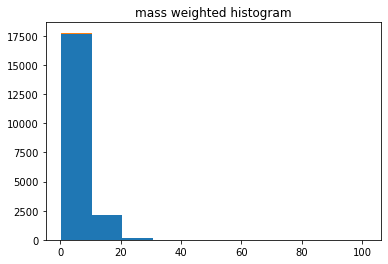

weighted: For signal mass, the yield is 20000.000000008542, the area is 201762.83572037236
weighted: For background mass, the yield is 20100.000000008502, the area is 202771.6498989734


In [82]:
# np.random.seed(42) 
# n_bins = 10
# x = np.random.randn(1000, 1) # values to plot, signal['mass'] and background['mass']
# fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2) # two plots

# unweighted_values_inbin, unweighted_bins, _ = ax0.hist(x, n_bins, density=False, histtype='bar')
# ax0.set_title('unweighted histogram')
# print(f"unweighted: the yield is {np.sum(unweighted_values_inbin)}, the area is {np.sum(unweighted_values_inbin) * (unweighted_bins[1] - unweighted_bins[0]) }")

# custom_weight = 0.001
# weighted_values_inbin, weighted_bins, _ = ax1.hist(x, n_bins, density=False, histtype='bar', weights= custom_weight * np.ones(x.shape[0]))
# ax1.set_title('weighted histogram')
# print(f"weighted: the yield is {np.sum(weighted_values_inbin)}, the area is {np.sum(weighted_values_inbin) * (weighted_bins[1] - weighted_bins[0]) }")

# Histogram for mass signal yield 100, bacjground yield 20,000 signal['mass'], backgrond['mass'
n_bins = 10

signal_weight = 0.001 * np.ones(signal['mass'].shape[0])
background_weight = 0.200 * np.ones(background['mass'].shape[0])


weight_array = np.column_stack((background_weight, signal_weight)) 


weighted_values_inbin, weighted_bins, _ = plt.hist([background['mass'], signal['mass']], n_bins, density=False, histtype='bar', stacked=True, weights=weight_array)
plt.title('mass weighted histogram')
plt.show()

print(f"weighted: For signal mass, the yield is {np.sum(weighted_values_inbin[0])}, the area is {np.sum(weighted_values_inbin[0]) * (weighted_bins[1] - weighted_bins[0]) }")
print(f"weighted: For background mass, the yield is {np.sum(weighted_values_inbin[1])}, the area is {np.sum(weighted_values_inbin[1]) * (weighted_bins[1] - weighted_bins[0]) }")

# Histogram for d2
n_bins = 10

signal_weight = 0.001 * np.ones(signal['d2'].shape[0])
background_weight = 0.200 * np.ones(background['d2'].shape[0])


weight_array = np.column_stack((background_weight, signal_weight)) 


weighted_values_inbin, weighted_bins, _ = plt.hist([background['d2'], signal['d2']], n_bins, density=False, histtype='bar', stacked=True, weights=weight_array)
plt.title('mass weighted histogram')
plt.show()

print(f"weighted: For signal mass, the yield is {np.sum(weighted_values_inbin[0])}, the area is {np.sum(weighted_values_inbin[0]) * (weighted_bins[1] - weighted_bins[0]) }")
print(f"weighted: For background mass, the yield is {np.sum(weighted_values_inbin[1])}, the area is {np.sum(weighted_values_inbin[1]) * (weighted_bins[1] - weighted_bins[0]) }")




3. Using the weighted samples from Q2 apply a Mass cut of [120, 130] GeV. Now again make the two histograms as above. Does the Mass distribution look as you expect it? how does the d2 plot compare to the one in Q2?

4. Corresponding to Now we want to scan over d2 to find the optimal cut to increase our significance. Scan over the d2 variable in a reasonable interval and calculate the significance for each cut value. Then plot significance vs. d2 cut value, choose the cut value corresponding to 3σ. Now plot the Mass distributions without the mass cut but with the optimal d2 cut. What do you observe in this plot? What is the significance value for this cut?
<br><br>
\begin{equation}
significance=N_{sigma} / \sqrt{N_{bkg}}
\end{equation}


### HERA

In [18]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt

path_to_data_file = './Hera/'

uv = UVData()
uv.read('./z.uvh5')
data = uv.data_array
print('This data array has shape:')
print('(# baselines*times, # spectral windows, # frequencies, # polarizations)')
print(np.shape(data))
print(data.ndim)

# Look at the antennas that are contained in the array:
print(sorted(uv.antenna_numbers))

This data array has shape:
(# baselines*times, # spectral windows, # frequencies, # polarizations)
(13320, 1, 1536, 1)
4
[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39, 44, 45, 46, 50, 51, 52, 53, 58, 59, 65, 66, 67, 68, 73, 75, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


1. For some baseline pair, compute the amplitude of the difference in visibility between each pair of adjacent time slices (there should be 19 such pairs, in total).

In [83]:
antenna1 = 140
antenna2 = 23
data_apair = uv.get_data(antenna1,antenna2)

2. Make some plots investigating this data and determine a reasonable amplitude threshold that will eliminate outliers. 

3. Apply this threshold to each pair of adjacent time slices to get a list of all frequencies that you will remove. To be conservative, if the amplitude for some frequency is above your threshold in any of the pairs, then that frequency should be removed. 

4. Make plots of your data (e.g., waterfall plots) before/after filtering to convince yourself that you have removed frequencies that exhibit large variation over time.

5. Remake the average amplitude vs frequency plot that you did in the previous lab before/after filtering. Are there still any frequencies that appear to have large amplitude? If so, why were they not removed?

6. To identify contamination in this lab, we transformed our data, looking at the difference of adjacent time slices to find large variation vs time. This is, in general, a key concept: transforming our data in some fashion to isolate a particular feature of the data and analyze it more closely. For the next lab, we will look for signals that are constant with time. What is a similar transformation that is likely to increase our sensitivity to such signals, compared to transient signals?

#### Bonus
 Do the procedure above for the high Pt data and inspect the significance. But this time use at least 3 observables (another variable in addition to d2 and mass)